In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

## 1. Load Data

#### Load the dataset
  Initially there are 2 datasets one for red wine and one for white wine.  I added a column on each file for the type of wine it is represented in the file.
  I import the files and merge them with the pandas concat function.
  To avoid bias, the data the shuffle function is applied.

In [2]:
data_r = pd.read_csv('./Data/winequality-red.csv')
data_r.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.4              0.70         0.00             1.9   
1     0            7.8              0.88         0.00             2.6   
2     0            7.8              0.76         0.04             2.3   
3     0           11.2              0.28         0.56             1.9   
4     0            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [3]:
data_w = pd.read_csv('./Data/winequality-white.csv')
data_w.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
frames = [data_r, data_w]
df = pd.concat(frames, ignore_index=True)
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.4              0.70         0.00             1.9   
1     0            7.8              0.88         0.00             2.6   
2     0            7.8              0.76         0.04             2.3   
3     0           11.2              0.28         0.56             1.9   
4     0            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [5]:
df = shuffle(df)
df.head(20)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4581     1            7.0             0.200         0.31            8.00   
3957     1            7.4             0.320         0.27           12.90   
986      0            9.8             0.340         0.39            1.40   
6414     1            6.2             0.760         0.01            3.20   
6202     1            5.0             0.330         0.18            4.60   
2562     1            6.1             0.190         0.25            4.00   
1892     1            6.2             0.280         0.22            7.30   
98       0            7.6             0.900         0.06            2.50   
2721     1            6.6             0.250         0.39            1.45   
1364     0            7.2             0.605         0.02            1.90   
1379     0            7.5             0.570         0.02            2.60   
1824     1            7.1             0.240         0.41           17.80   
6264     1            7.3             0.170         0.36            8.20   
5608     1            6.8             0.220         0.32            5.90   
5471     1            7.3             0.360         0.54           13.30   
1571     0            6.4             0.380         0.14            2.20   
5602     1            6.8             0.140         0.35            1.50   
4923     1            6.9             0.170         0.30            2.00   
2108     1            6.0             0.240         0.27            1.90   
1508     0            7.1             0.270         0.60            2.10   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4581      0.050                 29.0                 213.0  0.99596  3.28   
3957      0.040                 60.0                 221.0  0.99831  3.05   
986       0.066                  3.0                   7.0  0.99470  3.19   
6414      0.041                 18.0                 120.0  0.99026  3.20   
6202      0.032                 40.0                 124.0  0.99114  3.18   
2562      0.023                 23.0                 112.0  0.99230  3.37   
1892      0.041                 26.0                 157.0  0.99570  3.44   
98        0.079                  5.0                  10.0  0.99670  3.39   
2721      0.040                 40.0                  89.0  0.99110  3.35   
1364      0.096                 10.0                  31.0  0.99500  3.46   
1379      0.077                 11.0                  35.0  0.99557  3.36   
1824      0.046                 39.0                 145.0  0.99980  3.32   
6264      0.028                 44.0                 111.0  0.99272  3.14   
5608      0.054                 40.0                 152.0  0.99380  3.20   
5471      0.054                 63.0                 193.0  0.99864  3.06   
1571      0.038                 15.0                  25.0  0.99514  3.44   
5602      0.047                 40.0                 117.0  0.99111  3.07   
4923      0.047                 13.0                 117.0  0.99152  3.16   
2108      0.048                 40.0                 170.0  0.99380  3.64   
1508      0.074                 17.0                  25.0  0.99814  3.38   

      sulphates  alcohol  quality  
4581       0.57     10.4        6  
3957       0.66      9.4        5  
986        0.55     11.4        7  
6414       0.94     13.7        7  
6202       0.40     11.0        6  
2562       0.51     11.6        6  
1892       0.64      9.8        7  
98         0.56      9.8        5  
2721       0.40     11.4        7  
1364       0.53     11.8        6  
1379       0.62     10.8        6  
1824       0.39      8.7        5  
6264       0.41     12.4        6  
5608       0.57     10.8        6  
5471       0.49      8.6        4  
1571       0.65     11.1        6  
5602       0.72     11.1        6  
4923       0.51     11.6        6  
2108       0.54     10.0        7  
1508       0.72     10.6        6

## 2. Visualize the Data - Data Exploration

- __2.1. General Information / Statistical Information  / Verify NULLS__
- __2.2. Data Distribution__
- __2.3. Create Boxplots__
- __2.4. Pariplot Data with column ['type']:__
- __2.5. Correlation Matrix__

#### 2.1 General Information / Statistical Information / Verify NULLS

In [6]:
print(f"\nINFO:\n")
print(df.info())
print("\nDESCRIBE:\n")
print(df.describe())
print("\nNULLS\n")
print(df.isnull().sum())


INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 4581 to 5361
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None

DESCRIBE:

              type  fixed acidity  volatile aci

#### 2.2 Data Distribution

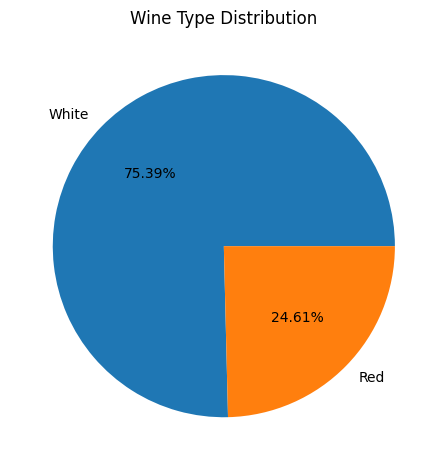

In [7]:
Types = df['type'].value_counts(normalize=True)
labels =['White','Red']
fig, ax = plt.subplots()
ax.pie(Types, labels=labels, autopct='%.2f%%')
ax.set_title('Wine Type Distribution')
plt.tight_layout()

#### 2.2 Create Boxplots

A boxplot is a graphical and standardised way to display the distribution of data based on five key numbers: 

- The “minimum”, 
- 1st Quartile (25th percentile)
- median (2nd Quartile./ 50th Percentile)
- 3rd Quartile (75th percentile)
- The “maximum”. 

The minimum and maximum values are defined as Q1–1.5 * IQR and Q3 + 1.5 * IQR respectively. Any points that fall outside of these limits are referred to as outliers.

<div>
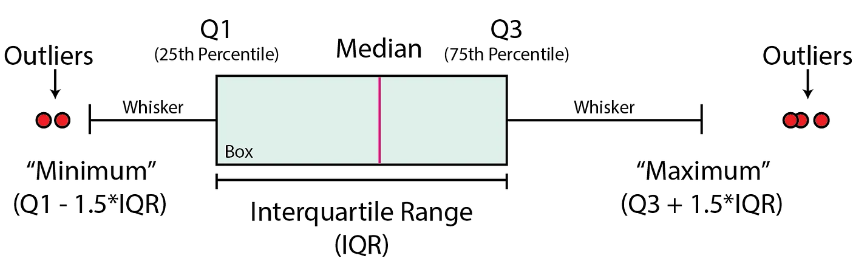
</div>

<br>

https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4

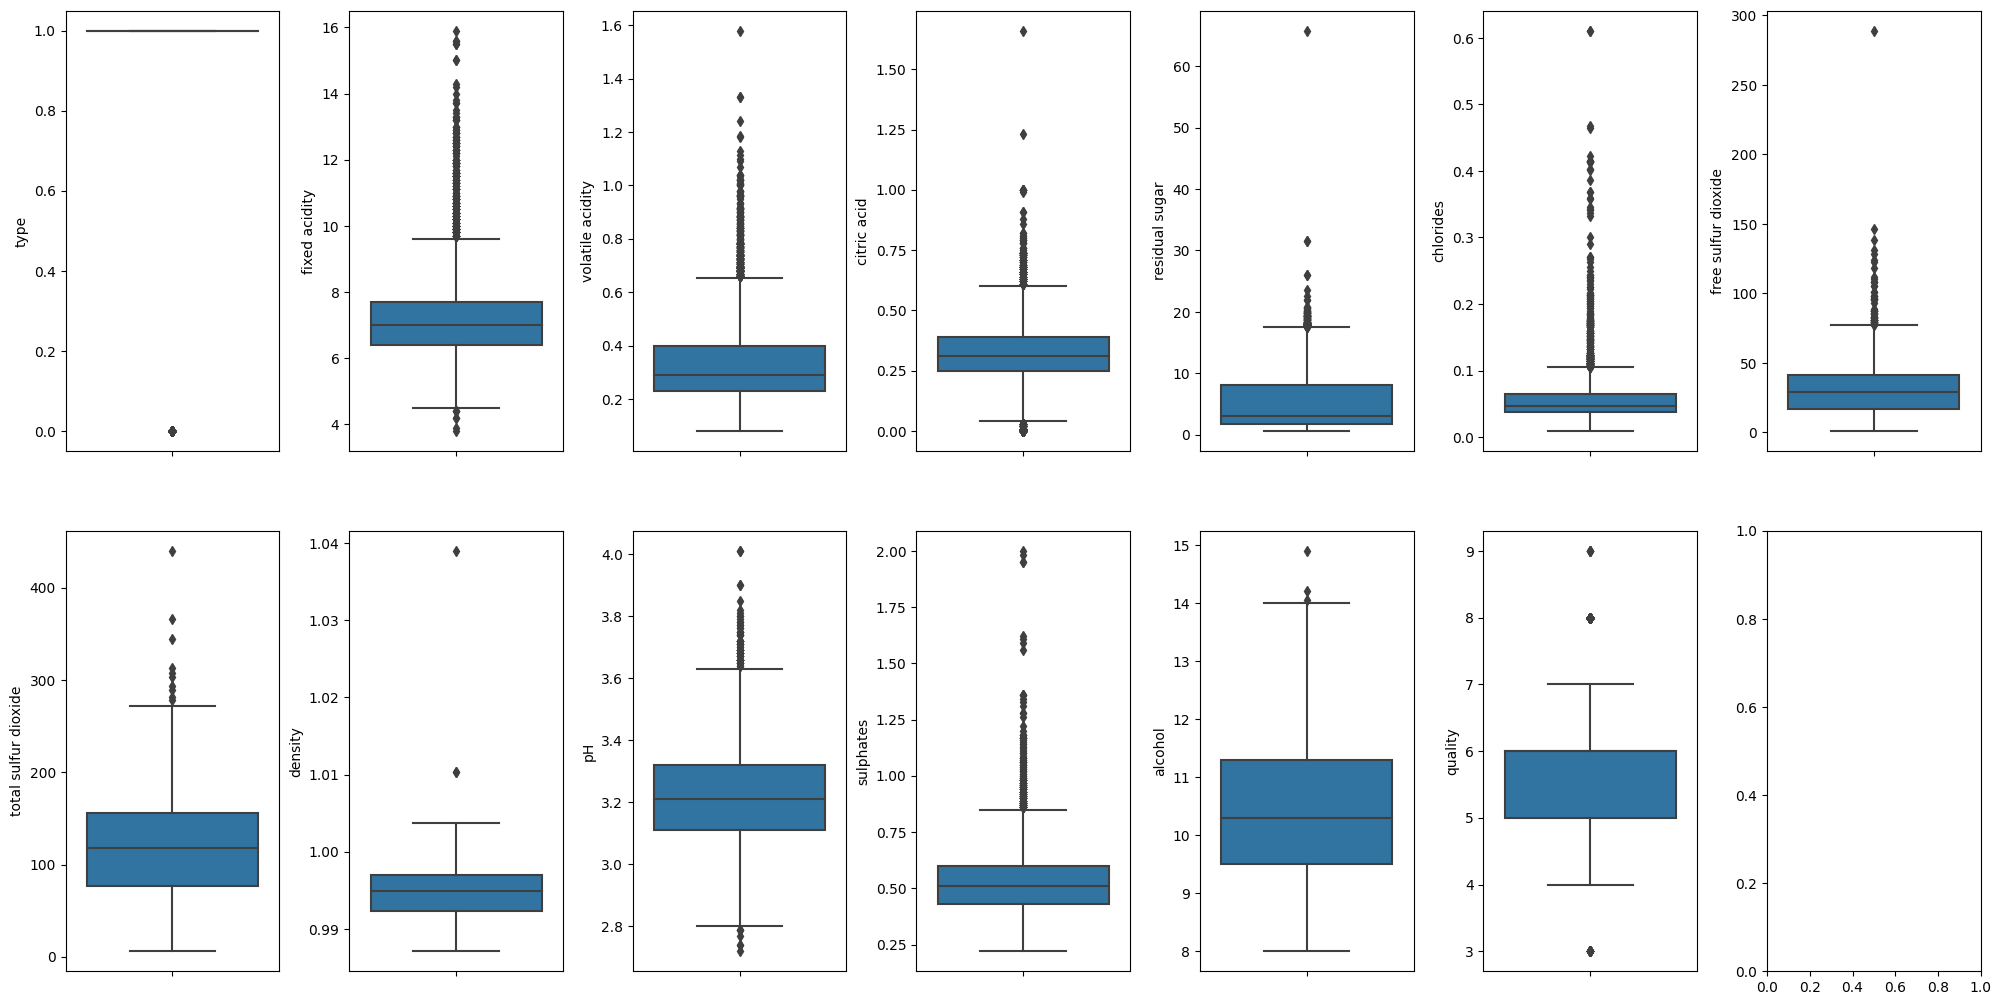

In [8]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))


index = 0
ax = ax.flatten()

for col, value in df.items():
    sb.boxplot(y=col, data=df, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### 2.3. Pairplot Data with column ['type']: 
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

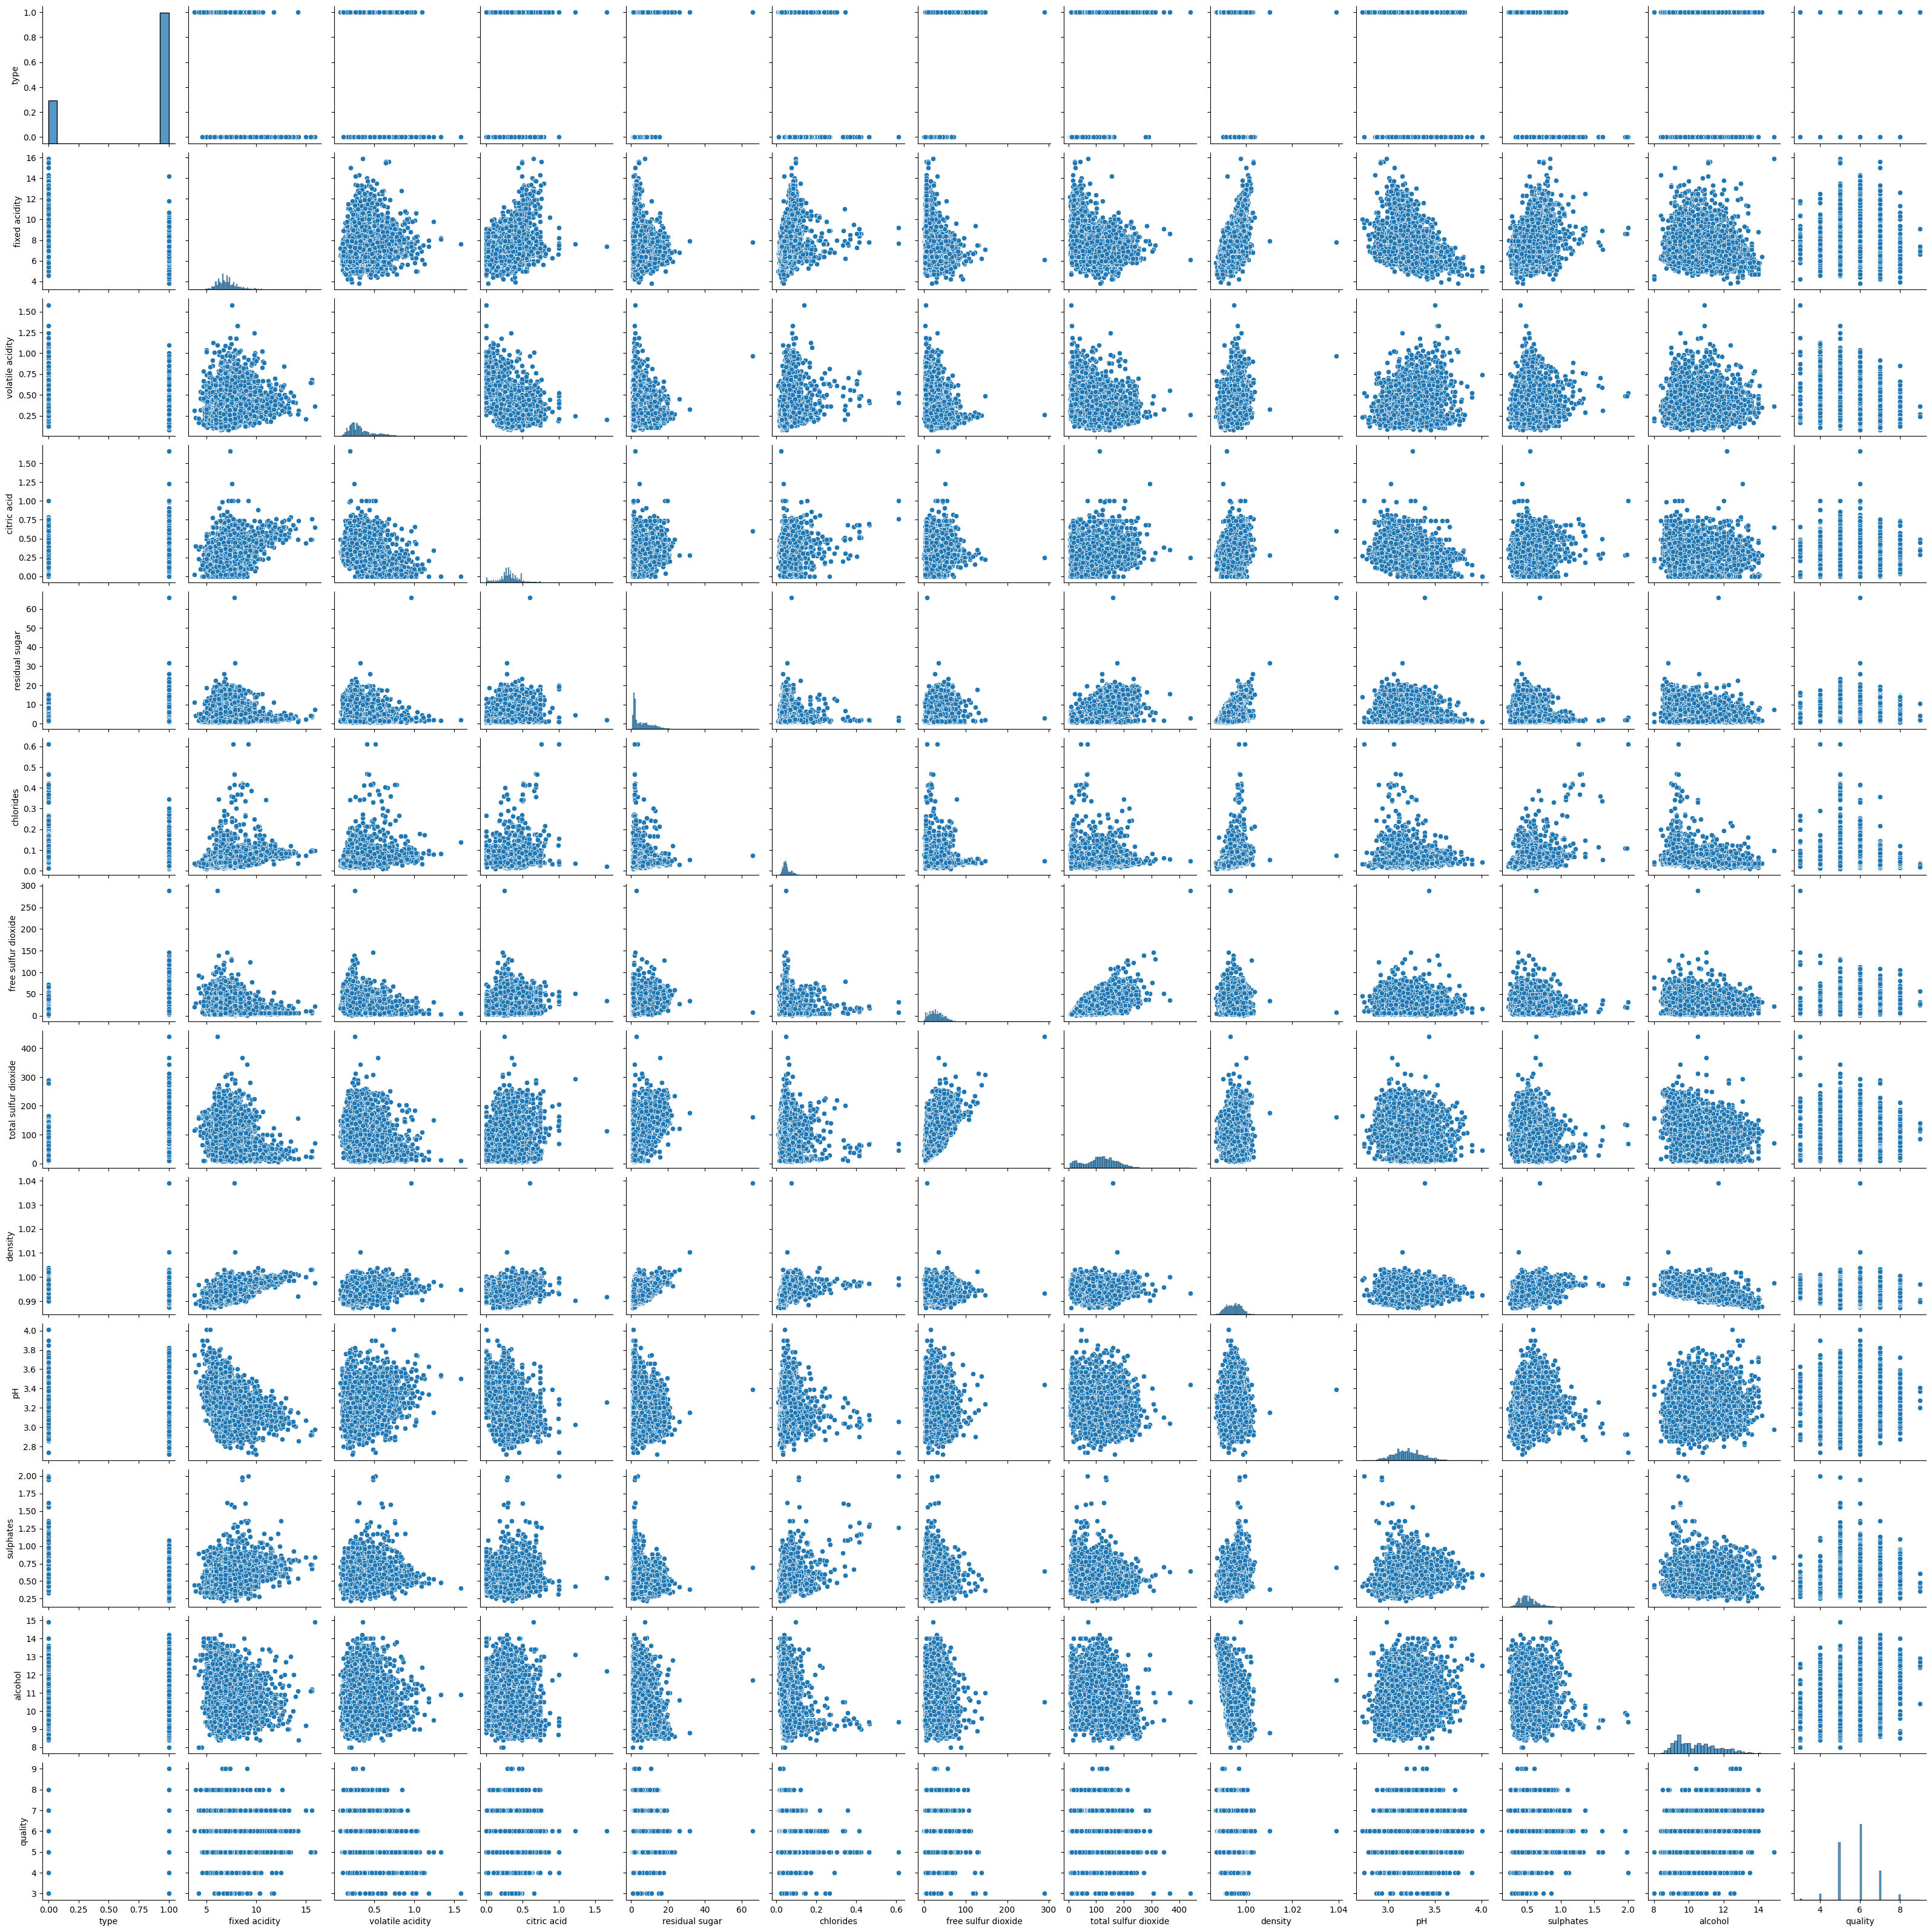

In [9]:
figsize=(10,5)
sb.pairplot(df)

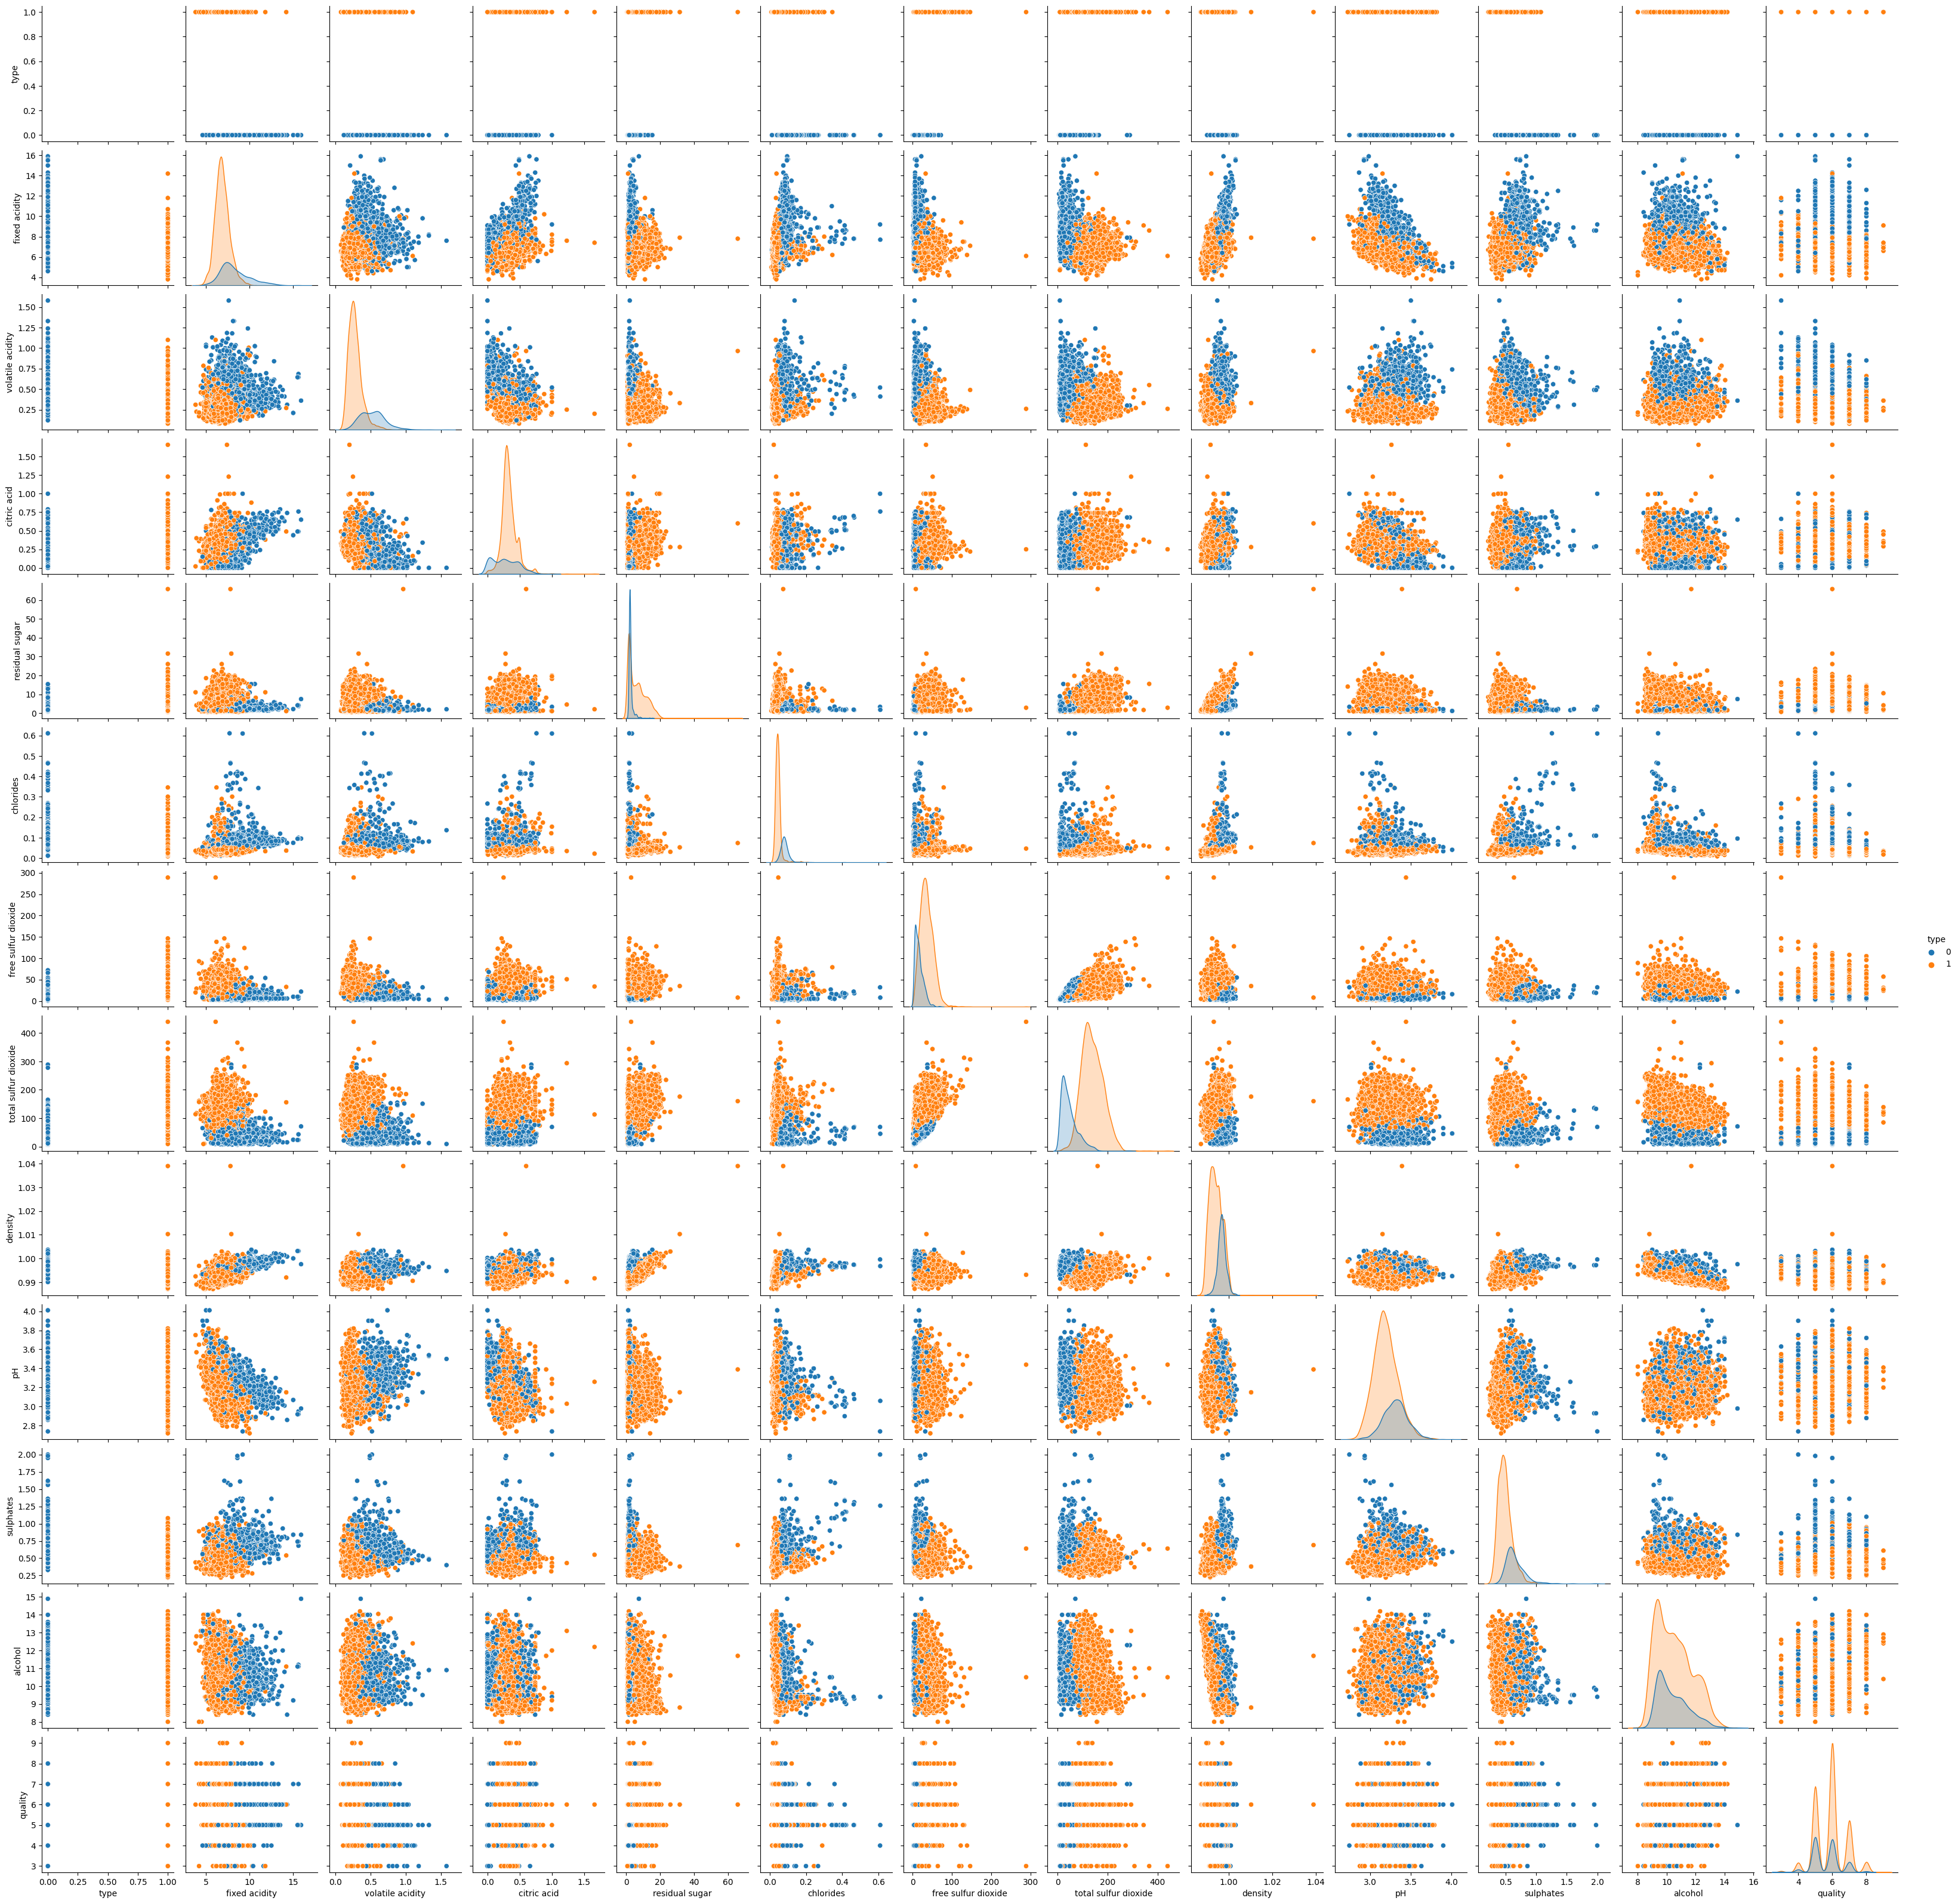

In [10]:
figsize=(10,5)
sb.pairplot(df, hue='type', vars=df.columns)

#### 2.4 Correlation Matrix
  A correlation matrix is a table containing correlation coefficients for many variables. Each cell in the table represents the correlation between two variables. The value might range between -1 and 1. A correlation matrix is used for summarizing the data, diagnose the advanced analysis, and as an input for a more complicated study.
  One way to quantify this relationship is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:

-1 indicates a perfectly negative linear correlation between two variables    
  0 indicates no linear correlation between two variables<br>
  1 indicates a perfectly positive linear correlation between two variables
  
  The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.
  
<br>

https://www.statology.org/how-to-read-a-correlation-matrix/

In [11]:
df.corr()['type'].sort_values(ascending=True)

volatile acidity       -0.653036
chlorides              -0.512678
sulphates              -0.487218
fixed acidity          -0.486740
density                -0.390645
pH                     -0.329129
alcohol                 0.032970
quality                 0.119323
citric acid             0.187397
residual sugar          0.348821
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
type                    1.000000
Name: type, dtype: float64

<AxesSubplot: >

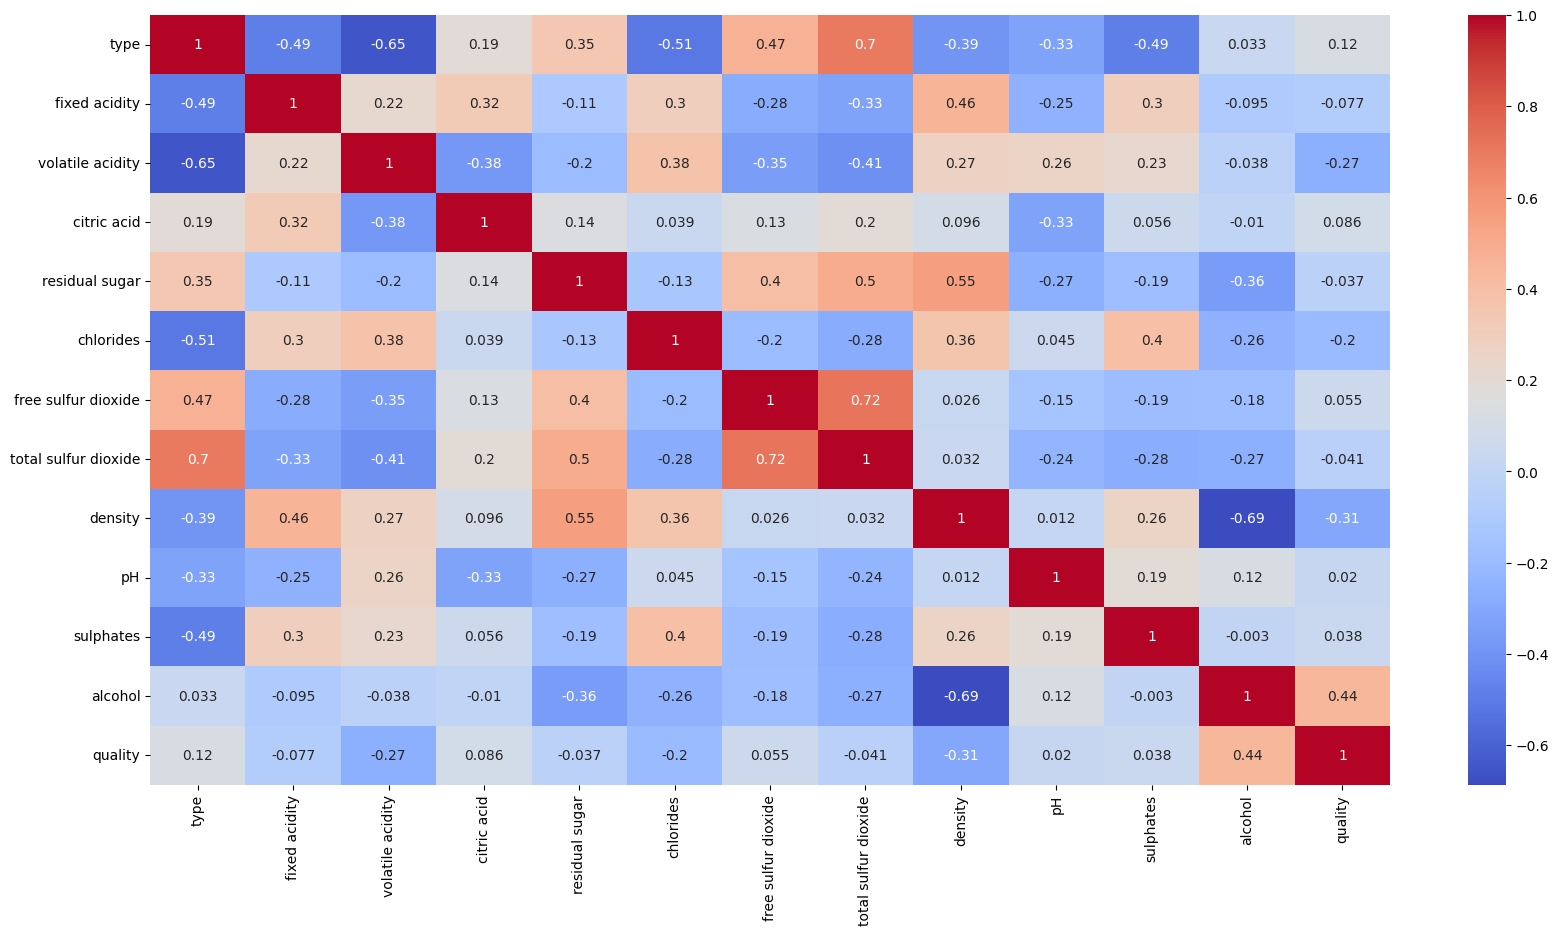

In [12]:
corr = df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr, annot=True, cmap='coolwarm')

## 3. Splitting the data for Training and Testing


In [13]:
X = df.drop(columns=['type'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10, stratify=y)

## 4. Testing Multiple Models

__4.1 KNeighborsClassifier__<br>
__4.2 DecisionTreeClassifier__<br>
__4.3 RandomForestClassifier__<br>
__4.4 Support Vector Machines__<br>
__4.5 GaussianNB__


In [14]:
def CreateModel(estimator_object, Results):
    print ("--------- Estimator: ",estimator_object, "--------------")
    estimator = estimator_object
    estimator.fit(X_train, y_train)
    pred_estimator = estimator.predict(X_test)
    print('\nAccuracy Score:', accuracy_score(y_test, pred_estimator))
    cm = confusion_matrix(y_test, pred_estimator)
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, pred_estimator))
    print('\nClassification Report:\n', classification_report(y_test, pred_estimator))
    report = classification_report(y_test, pred_estimator, output_dict=True)
    type_0 =  report['0']['precision'] 
    type_1 =  report['1']['precision'] 
    cross_val = cross_val_score(estimator=estimator, X=X_test, y=y_test, cv=30)
    CVM = cross_val.mean()
    CVS = cross_val.std()
    print(f'\nMean accuracy:\n{CVM:.2%}')
    print(f'\nStandard deviation:\n {CVS:.2%}')

    Results['CVM'].append(CVM)
    Results['CVS'].append(CVS)
    Results['P_R'].append(type_0)
    Results['P_W'].append(type_1)
    
    figsize=(10,5)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [15]:
estimators = {
     'KNeighborsClassifier': KNeighborsClassifier() , 
     'DecisionTreeClassifier': DecisionTreeClassifier(),
     'RandomForestClassifier': RandomForestClassifier(),
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()
}

Results = {}
Results = {'Estimator': [key for key in estimators], 'CVM': [], 'CVS': [], 'P_R': [], 'P_W': []}

--------- Estimator:  KNeighborsClassifier() --------------

Accuracy Score: 0.946923076923077

Confusion Matrix:
 [[282  38]
 [ 31 949]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       320
           1       0.96      0.97      0.96       980

    accuracy                           0.95      1300
   macro avg       0.93      0.92      0.93      1300
weighted avg       0.95      0.95      0.95      1300


Mean accuracy:
94.46%

Standard deviation:
 3.29%


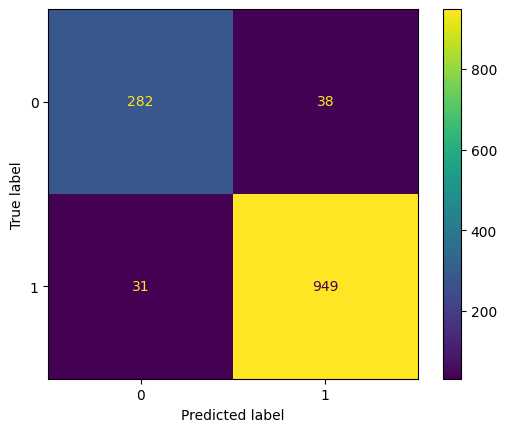

--------- Estimator:  DecisionTreeClassifier() --------------

Accuracy Score: 0.9846153846153847

Confusion Matrix:
 [[311   9]
 [ 11 969]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.99      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
97.62%

Standard deviation:
 2.19%


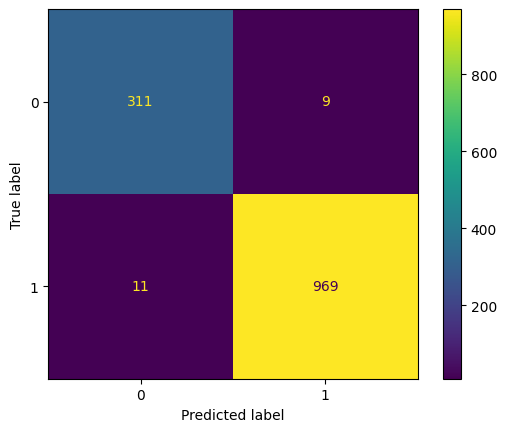

--------- Estimator:  RandomForestClassifier() --------------

Accuracy Score: 0.9961538461538462

Confusion Matrix:
 [[316   4]
 [  1 979]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300


Mean accuracy:
99.23%

Standard deviation:
 1.23%


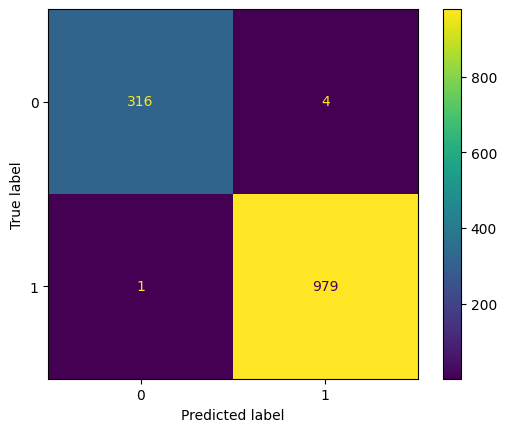

--------- Estimator:  SVC() --------------

Accuracy Score: 0.9484615384615385

Confusion Matrix:
 [[273  47]
 [ 20 960]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       320
           1       0.95      0.98      0.97       980

    accuracy                           0.95      1300
   macro avg       0.94      0.92      0.93      1300
weighted avg       0.95      0.95      0.95      1300


Mean accuracy:
94.23%

Standard deviation:
 3.14%


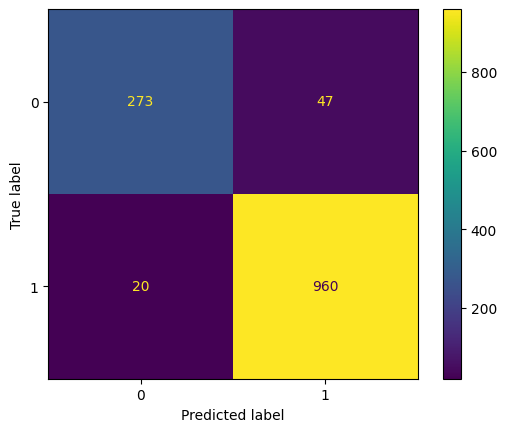

--------- Estimator:  GaussianNB() --------------

Accuracy Score: 0.9676923076923077

Confusion Matrix:
 [[314   6]
 [ 36 944]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.99      0.96      0.98       980

    accuracy                           0.97      1300
   macro avg       0.95      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300


Mean accuracy:
96.85%

Standard deviation:
 2.68%


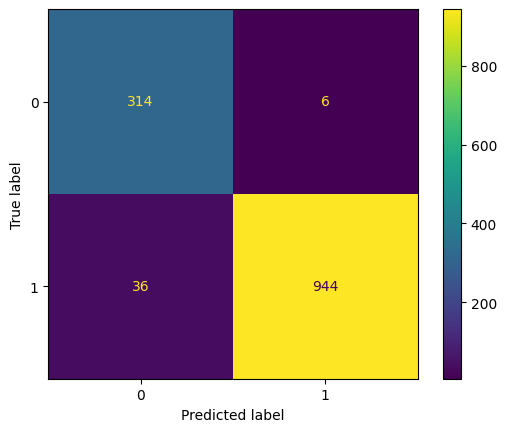

In [16]:
for estimator in estimators:
    CreateModel(estimators[estimator],Results)

In [17]:
print(type(Results))
Results

<class 'dict'>


{'Estimator': ['KNeighborsClassifier',
  'DecisionTreeClassifier',
  'RandomForestClassifier',
  'SVC',
  'GaussianNB'],
 'CVM': [0.9446441155743481,
  0.9761627906976744,
  0.9923361522198733,
  0.9423009161381254,
  0.9684989429175473],
 'CVS': [0.03285864283838502,
  0.021872646965728878,
  0.012325894164490338,
  0.03137389238084196,
  0.026786004902883034],
 'P_R': [0.9009584664536742,
  0.9658385093167702,
  0.9968454258675079,
  0.931740614334471,
  0.8971428571428571],
 'P_W': [0.961499493414387,
  0.99079754601227,
  0.9959308240081384,
  0.9533267130089375,
  0.9936842105263158]}

In [18]:
Results_df = pd.DataFrame(Results)
Results_df

Estimator       CVM       CVS       P_R       P_W
0    KNeighborsClassifier  0.944644  0.032859  0.900958  0.961499
1  DecisionTreeClassifier  0.976163  0.021873  0.965839  0.990798
2  RandomForestClassifier  0.992336  0.012326  0.996845  0.995931
3                     SVC  0.942301  0.031374  0.931741  0.953327
4              GaussianNB  0.968499  0.026786  0.897143  0.993684

In [19]:
# set index using column
Results_df = Results_df.set_index('Estimator')
Results_df

CVM       CVS       P_R       P_W
Estimator                                                     
KNeighborsClassifier    0.944644  0.032859  0.900958  0.961499
DecisionTreeClassifier  0.976163  0.021873  0.965839  0.990798
RandomForestClassifier  0.992336  0.012326  0.996845  0.995931
SVC                     0.942301  0.031374  0.931741  0.953327
GaussianNB              0.968499  0.026786  0.897143  0.993684

Text(0, 0.5, 'Score')

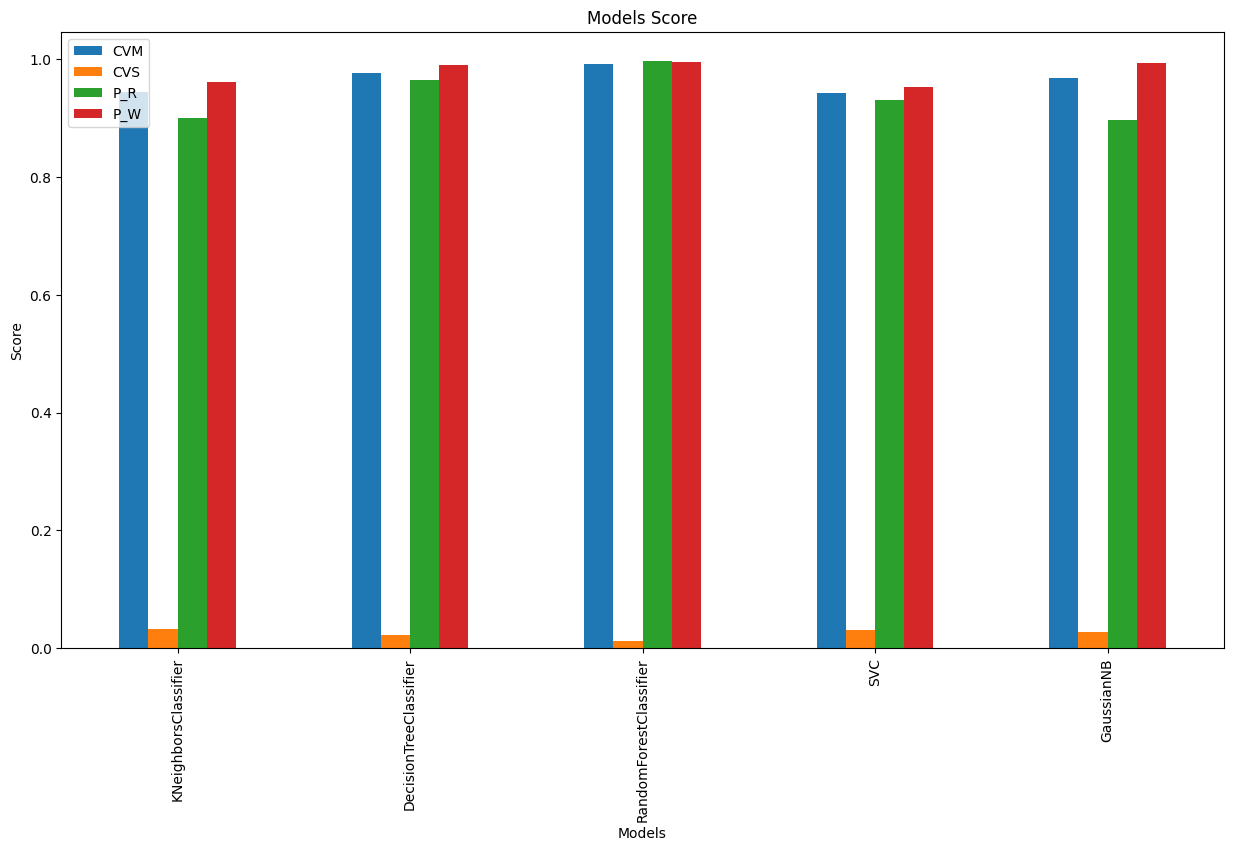

In [20]:
Results_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

In [21]:
#print(Results_df['CVS'])
Res_CVS=Results_df['CVS']
print(Res_CVS)

Estimator
KNeighborsClassifier      0.032859
DecisionTreeClassifier    0.021873
RandomForestClassifier    0.012326
SVC                       0.031374
GaussianNB                0.026786
Name: CVS, dtype: float64


Text(0, 0.5, 'Score')

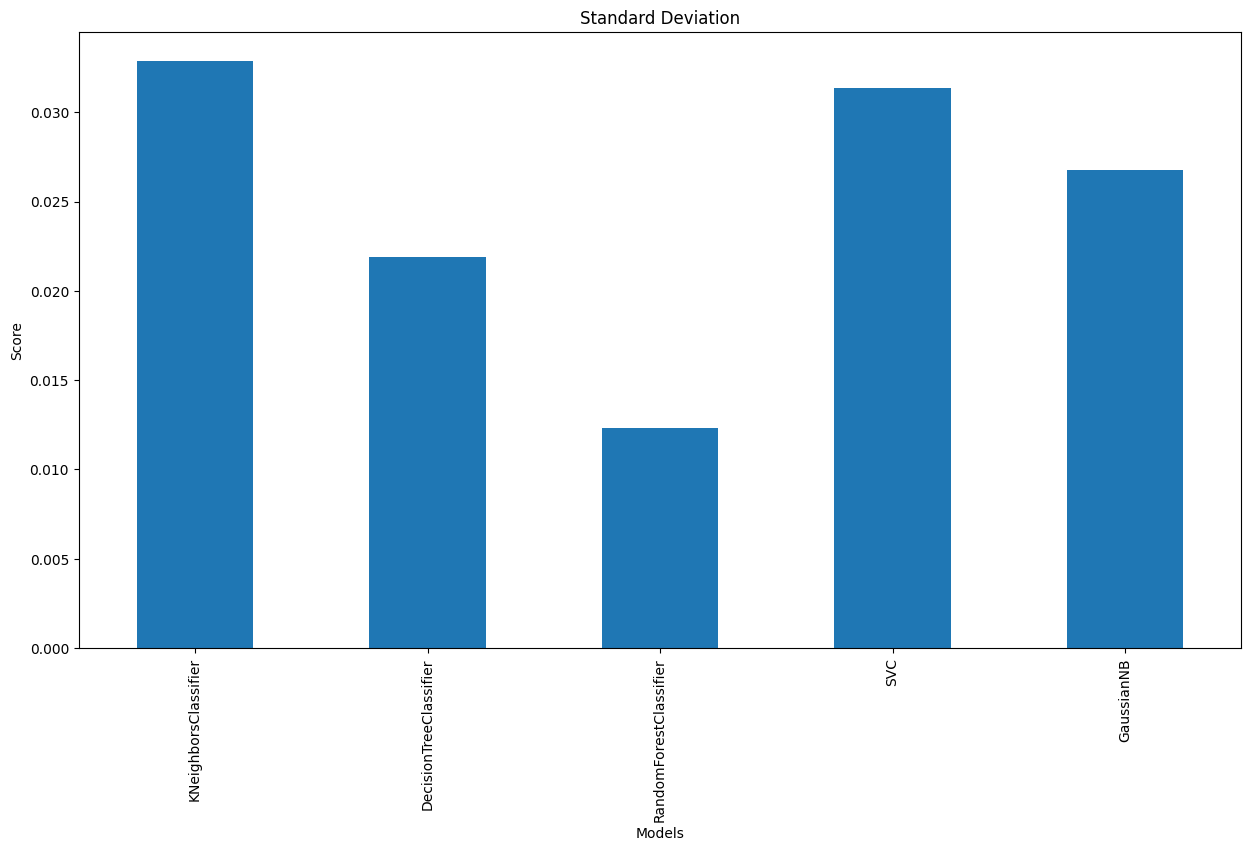

In [23]:
Res_CVS.plot(kind="bar",figsize=(15, 8))
plt.title("Standard Deviation")
plt.xlabel("Models")
plt.ylabel("Score")

## 5. Testing The Models using KFold



<div>
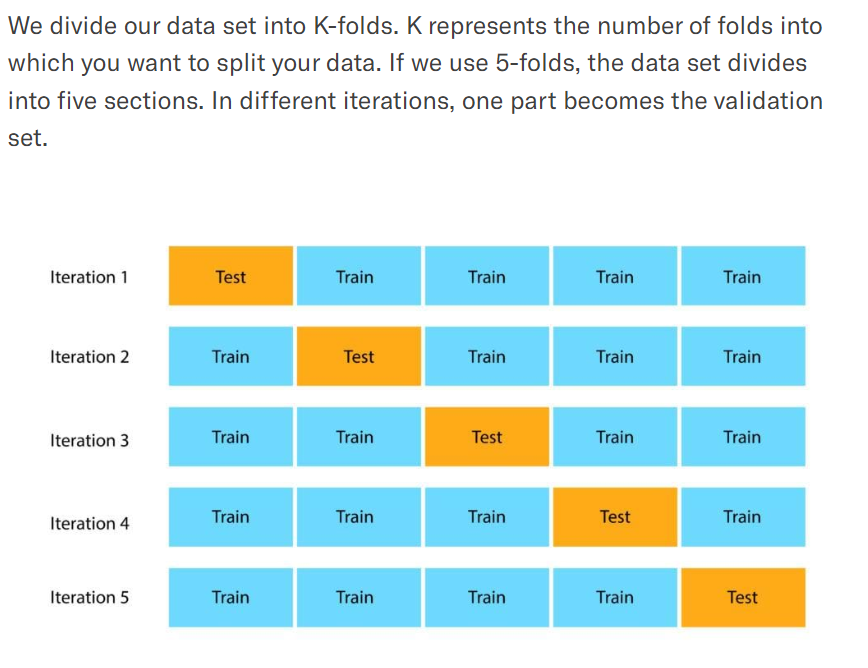
</div>

<br>
In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.<br>


https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/<br>

https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/
  


In [24]:
Results_KFold={}
Results_KFold = {'Estimator': [key + "_Kfold" for key in estimators], 'CVM': [], 'CVS': []}

In [25]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X, y=y, cv=kfold)
    print(f'{estimator_name:>25}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}') 
    Results_KFold['CVM'].append(scores.mean())
    Results_KFold['CVS'].append(scores.std())

     KNeighborsClassifier: mean accuracy=94.44%; standard deviation=0.87%
   DecisionTreeClassifier: mean accuracy=98.63%; standard deviation=0.35%
   RandomForestClassifier: mean accuracy=99.46%; standard deviation=0.21%
                      SVC: mean accuracy=93.67%; standard deviation=0.51%
               GaussianNB: mean accuracy=97.12%; standard deviation=0.51%


In [450]:
Results_KFold_df = pd.DataFrame(Results_KFold)
Results_KFold_df = Results_KFold_df.set_index('Estimator')

#Results_df = pd.DataFrame(Results)
#Results_df = Results_df.set_index('Estimator')
Results_KFold_df

CVM       CVS
Estimator                                       
KNeighborsClassifier_Kfold    0.946899  0.008347
DecisionTreeClassifier_Kfold  0.986917  0.004526
RandomForestClassifier_Kfold  0.995074  0.001923
SVC_Kfold                     0.936125  0.009412
GaussianNB_Kfold              0.971373  0.005195

Text(0, 0.5, 'Score')

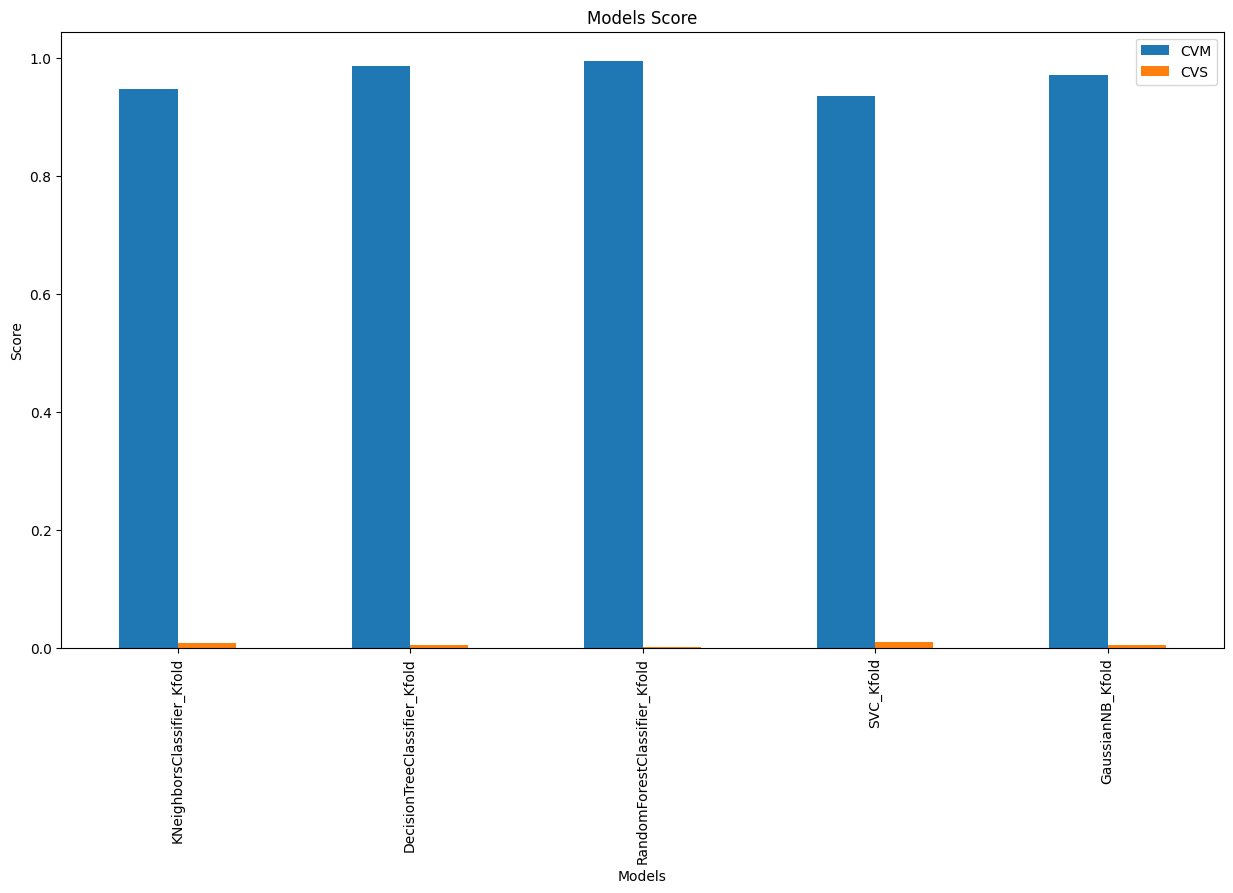

In [451]:
Results_KFold_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

In [454]:
#print(Results_df['CVS'])
Res_KFold_CVS = Results_KFold_df['CVS']
print(Res_KFold_CVS)

Estimator
KNeighborsClassifier_Kfold      0.008347
DecisionTreeClassifier_Kfold    0.004526
RandomForestClassifier_Kfold    0.001923
SVC_Kfold                       0.009412
GaussianNB_Kfold                0.005195
Name: CVS, dtype: float64


Text(0, 0.5, 'Score')

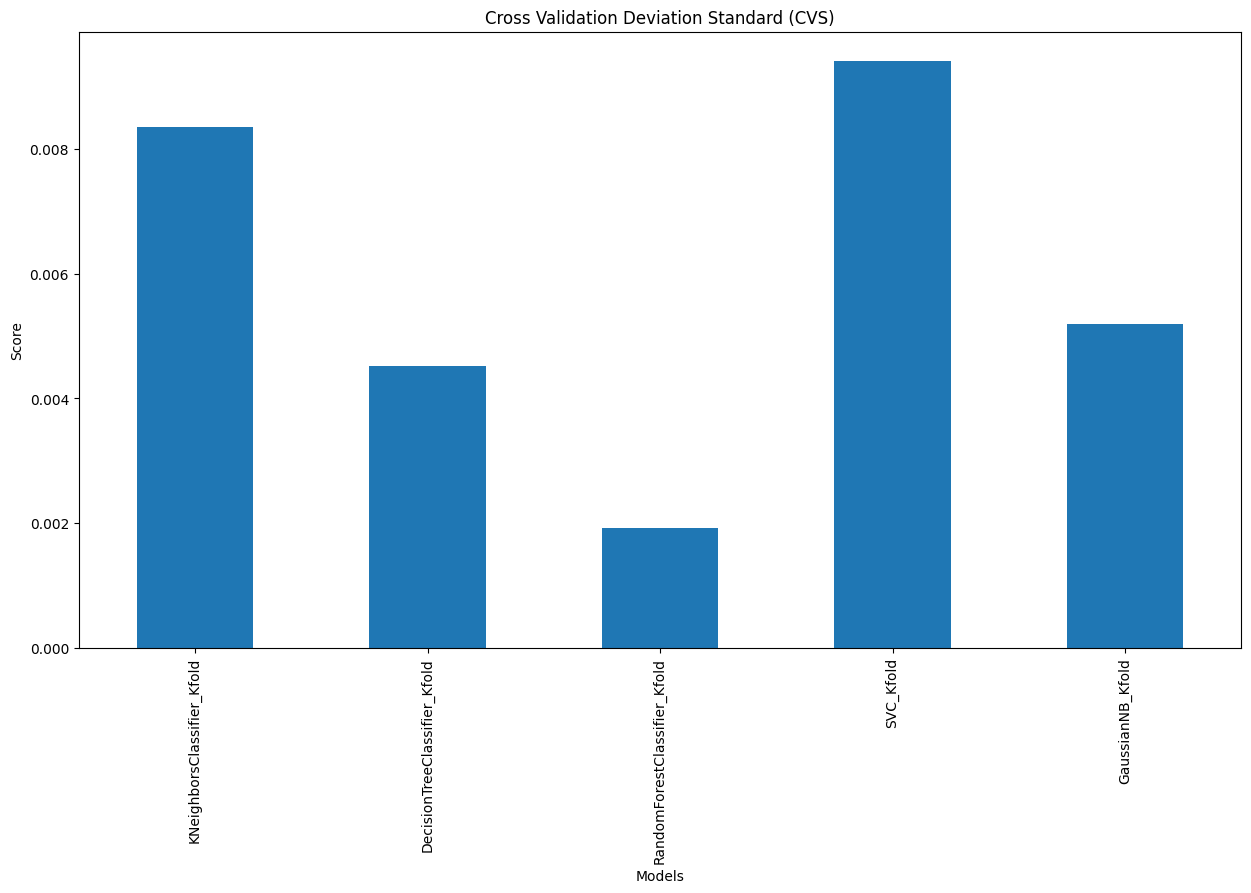

In [455]:
Res_KFold_CVS.plot(kind="bar",figsize=(15, 8))
plt.title("Cross Validation Deviation Standard (CVS)")
plt.xlabel("Models")
plt.ylabel("Score")

## 6. Hyperparameters Tuning using GridSearchCV and RandomizedSearchCV on each Model

In [28]:
#KNeighborsClassifier
param_grid_KNeighborsClassifier = {'n_neighbors': list(range(1, 31)),
              'weights' :['uniform', 'distance']}

#Parameters DecisonTreeClassifier
param_grid_DecisionTreeClassifier = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']}

#Parameters RandomForestClassifier
param_grid_RandomForestClassifier = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]}

#SVC
param_grid_SVC = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 

#GaussianNB
param_grid_GaussianNB = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}



hyper_parameters_estimators = {
    'KNeighborsClassifier': [KNeighborsClassifier(), param_grid_KNeighborsClassifier],
    'DecisionTreeClassifier': [DecisionTreeClassifier(), param_grid_DecisionTreeClassifier],
    'RandomForestClassifier': [RandomForestClassifier(), param_grid_RandomForestClassifier],
    'SVC': [SVC(),param_grid_SVC],
    'GaussianNB': [GaussianNB(), param_grid_GaussianNB]}

hpe_df = pd.DataFrame(hyper_parameters_estimators)
hpe_df

KNeighborsClassifier  \
0                             KNeighborsClassifier()   
1  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10...   

                              DecisionTreeClassifier  \
0                           DecisionTreeClassifier()   
1  {'max_features': ['sqrt', 'log2'], 'ccp_alpha'...   

                              RandomForestClassifier  \
0                           RandomForestClassifier()   
1  {'n_estimators': [25, 50, 100, 150], 'max_feat...   

                                                 SVC  \
0                                              SVC()   
1  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0....   

                                          GaussianNB  
0                                       GaussianNB()  
1  {'var_smoothing': [0.01, 0.001, 0.0001, 1e-05,...

In [29]:
#prints how to select the hyperparameters to use the funciont HyperTun and find the best hypertunnable parameters
for estimator in estimators.keys():
#    print(estimator)
    Model = hpe_df[estimator][0]
    Parameters = hpe_df[estimator][1]
    print("Estimator",estimator,"\n")
    print("Model", Model, "\n")
    print("Parameters", Parameters, "\n")

Estimator KNeighborsClassifier 

Model KNeighborsClassifier() 

Parameters {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']} 

Estimator DecisionTreeClassifier 

Model DecisionTreeClassifier() 

Parameters {'max_features': ['sqrt', 'log2'], 'ccp_alpha': [0.1, 0.01, 0.001], 'max_depth': [5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']} 

Estimator RandomForestClassifier 

Model RandomForestClassifier() 

Parameters {'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]} 

Estimator SVC 

Model SVC() 

Parameters {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']} 

Estimator GaussianNB 

Model GaussianNB() 

Parameters {'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]} 



In [30]:
def HyperTun (name, estimator, param_grid, Result):
    grid = GridSearchCV(estimator, param_grid, refit = True)
    grid.fit(X_train, y_train)
    print("\nModel -------------",name,"------------------\n")
    print("GridSearchCV\n")
    Grid_Best_Est = grid.best_estimator_
    print(f'{"Best Estimator:  ":>25}' + f'{Grid_Best_Est}')
    print(f'{"Best Score:  ":>25}' + f'{grid.best_score_}')
    print(f'{"Best Parameters:  ":>25}' + f'{grid.best_params_}')
    pred_optimized = grid.predict(X_test)
    print("\nOptimized Best Parameters:\n ", classification_report(y_test, pred_optimized))
    Result[name + '_Grid'] = Grid_Best_Est
    
    rs=RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=60, cv=3, random_state=42)
    rs.fit(X_train, y_train)
    print("\nRandomizedSearchCV\n")
    RS_Best_Est = rs.best_estimator_
    print(f'{"Best Estimator:  ":>25}' + f'{RS_Best_Est}')
    print(f'{"Best Score:  ":>25}' + f'{rs.best_score_}')
    print(f'{"Best Parameters:  ":>25}' + f'{rs.best_params_}')
    pred_optimized = rs.predict(X_test)
    print("\nOptimized Best Parameters:\n ", classification_report(y_test, pred_optimized))
    Result[name + '_RS'] = RS_Best_Est
    

In [31]:
HyperTunPar = {}
HyperTunPar

{}

In [32]:
HyperTun('KNeighborsClassifier',KNeighborsClassifier(),param_grid_KNeighborsClassifier,HyperTunPar)
HyperTun('DecisionTreeClassifier',DecisionTreeClassifier(), param_grid_DecisionTreeClassifier,HyperTunPar)
HyperTun('RandomForestClassifier',RandomForestClassifier(), param_grid_RandomForestClassifier,HyperTunPar)
HyperTun('SVC',SVC(), param_grid_SVC,HyperTunPar)
HyperTun('GaussianNB', GaussianNB(), param_grid_GaussianNB,HyperTunPar)


Model ------------- KNeighborsClassifier ------------------

GridSearchCV

        Best Estimator:  KNeighborsClassifier(n_neighbors=8, weights='distance')
            Best Score:  0.9547812245502332
       Best Parameters:  {'n_neighbors': 8, 'weights': 'distance'}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.93      0.90      0.91       320
           1       0.97      0.98      0.97       980

    accuracy                           0.96      1300
   macro avg       0.95      0.94      0.94      1300
weighted avg       0.96      0.96      0.96      1300


RandomizedSearchCV

        Best Estimator:  KNeighborsClassifier(n_neighbors=8, weights='distance')
            Best Score:  0.9509325607562656
       Best Parameters:  {'weights': 'distance', 'n_neighbors': 8}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.93      0.90      0.91       320
           1       0.97

C:\Users\v_moreno\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 50 is smaller than n_iter=60. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



RandomizedSearchCV

        Best Estimator:  SVC(C=100, gamma=1, kernel='linear')
            Best Score:  0.987685054018649
       Best Parameters:  {'kernel': 'linear', 'gamma': 1, 'C': 100}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Model ------------- GaussianNB ------------------

GridSearchCV

        Best Estimator:  GaussianNB(var_smoothing=1e-10)
            Best Score:  0.9757544236321907
       Best Parameters:  {'var_smoothing': 1e-10}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.99      0.97      0.98       980

    accuracy                          

C:\Users\v_moreno\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 14 is smaller than n_iter=60. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [53]:
HyperTunPar

{'KNeighborsClassifier_Grid': KNeighborsClassifier(n_neighbors=8, weights='distance'),
 'KNeighborsClassifier_RS': KNeighborsClassifier(n_neighbors=8, weights='distance'),
 'DecisionTreeClassifier_Grid': DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                        max_features='sqrt'),
 'DecisionTreeClassifier_RS': DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                        max_features='sqrt'),
 'RandomForestClassifier_Grid': RandomForestClassifier(max_depth=6, max_leaf_nodes=9),
 'RandomForestClassifier_RS': RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150),
 'SVC_Grid': SVC(C=100, gamma=1, kernel='linear'),
 'SVC_RS': SVC(C=100, gamma=1, kernel='linear'),
 'GaussianNB_Grid': GaussianNB(var_smoothing=1e-10),
 'GaussianNB_RS': GaussianNB(var_smoothing=1e-10)}

In [65]:
for i in HyperTunPar.keys():
    print("\n--------",i)
    print(HyperTunPar[i])



-------- KNeighborsClassifier_Grid
KNeighborsClassifier(n_neighbors=8, weights='distance')

-------- KNeighborsClassifier_RS
KNeighborsClassifier(n_neighbors=8, weights='distance')

-------- DecisionTreeClassifier_Grid
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='sqrt')

-------- DecisionTreeClassifier_RS
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt')

-------- RandomForestClassifier_Grid
RandomForestClassifier(max_depth=6, max_leaf_nodes=9)

-------- RandomForestClassifier_RS
RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)

-------- SVC_Grid
SVC(C=100, gamma=1, kernel='linear')

-------- SVC_RS
SVC(C=100, gamma=1, kernel='linear')

-------- GaussianNB_Grid
GaussianNB(var_smoothing=1e-10)

-------- GaussianNB_RS
GaussianNB(var_smoothing=1e-10)


KNeighborsClassifier_Grid
Name KNeighborsClassifier(n_neighbors=8, weights='distance') 

--------- Estimator:  KNeighborsClassifier(n_neighbors=8, weights='distance') --------------

Accuracy Score: 0.9569230769230769

Confusion Matrix:
 [[287  33]
 [ 23 957]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       320
           1       0.97      0.98      0.97       980

    accuracy                           0.96      1300
   macro avg       0.95      0.94      0.94      1300
weighted avg       0.96      0.96      0.96      1300


Mean accuracy:
95.08%

Standard deviation:
 3.19%


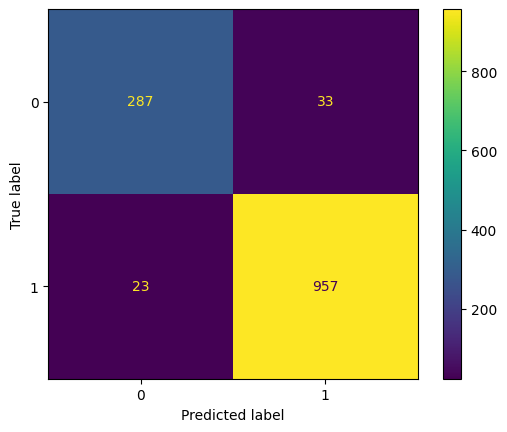

KNeighborsClassifier_RS
Name KNeighborsClassifier(n_neighbors=8, weights='distance') 

--------- Estimator:  KNeighborsClassifier(n_neighbors=8, weights='distance') --------------

Accuracy Score: 0.9569230769230769

Confusion Matrix:
 [[287  33]
 [ 23 957]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       320
           1       0.97      0.98      0.97       980

    accuracy                           0.96      1300
   macro avg       0.95      0.94      0.94      1300
weighted avg       0.96      0.96      0.96      1300


Mean accuracy:
95.08%

Standard deviation:
 3.19%


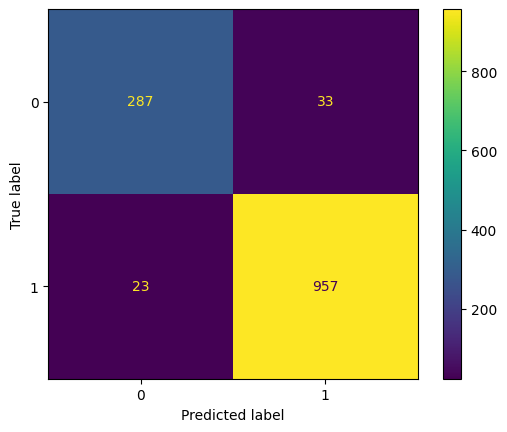

DecisionTreeClassifier_Grid
Name DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='sqrt') 

--------- Estimator:  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='sqrt') --------------

Accuracy Score: 0.9861538461538462

Confusion Matrix:
 [[308  12]
 [  6 974]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       320
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
97.54%

Standard deviation:
 2.05%


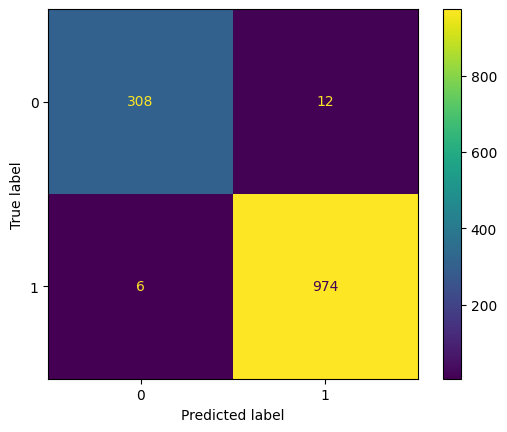

DecisionTreeClassifier_RS
Name DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt') 

--------- Estimator:  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt') --------------

Accuracy Score: 0.9846153846153847

Confusion Matrix:
 [[310  10]
 [ 10 970]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.99      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
97.08%

Standard deviation:
 2.45%


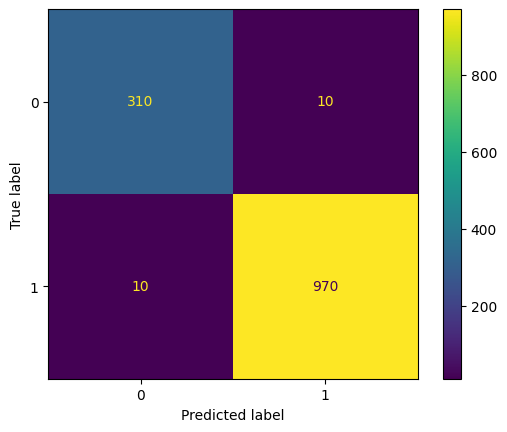

RandomForestClassifier_Grid
Name RandomForestClassifier(max_depth=6, max_leaf_nodes=9) 

--------- Estimator:  RandomForestClassifier(max_depth=6, max_leaf_nodes=9) --------------

Accuracy Score: 0.99

Confusion Matrix:
 [[309  11]
 [  2 978]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
98.62%

Standard deviation:
 2.01%


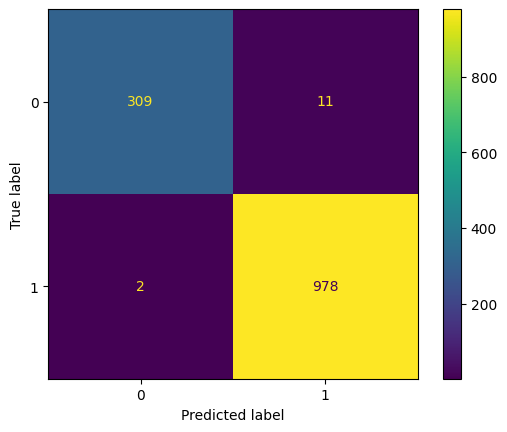

RandomForestClassifier_RS
Name RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150) 

--------- Estimator:  RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150) --------------

Accuracy Score: 0.9884615384615385

Confusion Matrix:
 [[308  12]
 [  3 977]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
98.70%

Standard deviation:
 1.84%


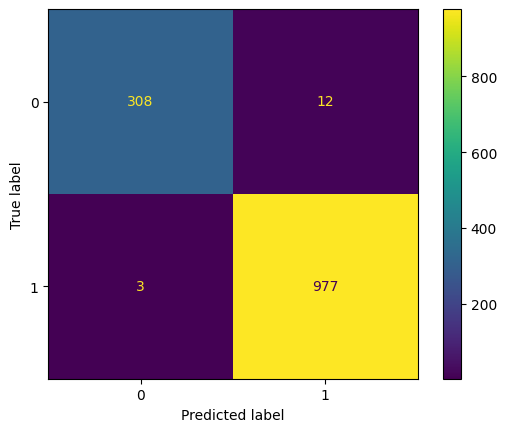

SVC_Grid
Name SVC(C=100, gamma=1, kernel='linear') 

--------- Estimator:  SVC(C=100, gamma=1, kernel='linear') --------------

Accuracy Score: 0.9946153846153846

Confusion Matrix:
 [[315   5]
 [  2 978]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
99.15%

Standard deviation:
 1.52%


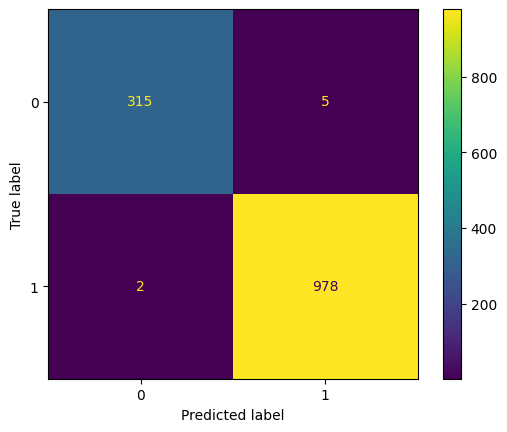

SVC_RS
Name SVC(C=100, gamma=1, kernel='linear') 

--------- Estimator:  SVC(C=100, gamma=1, kernel='linear') --------------

Accuracy Score: 0.9946153846153846

Confusion Matrix:
 [[315   5]
 [  2 978]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
99.15%

Standard deviation:
 1.52%


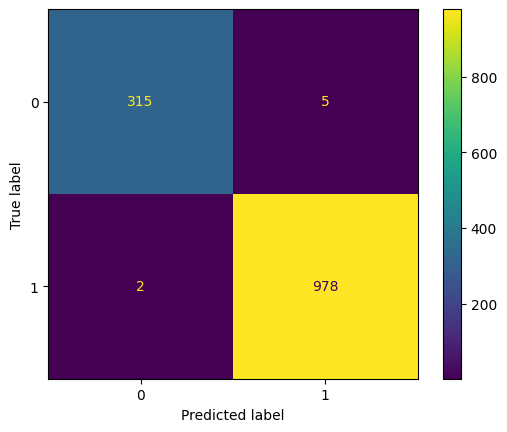

GaussianNB_Grid
Name GaussianNB(var_smoothing=1e-10) 

--------- Estimator:  GaussianNB(var_smoothing=1e-10) --------------

Accuracy Score: 0.9684615384615385

Confusion Matrix:
 [[313   7]
 [ 34 946]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.99      0.97      0.98       980

    accuracy                           0.97      1300
   macro avg       0.95      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300


Mean accuracy:
97.31%

Standard deviation:
 2.51%


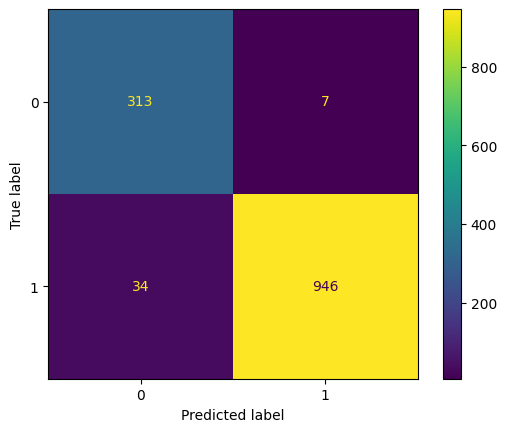

GaussianNB_RS
Name GaussianNB(var_smoothing=1e-10) 

--------- Estimator:  GaussianNB(var_smoothing=1e-10) --------------

Accuracy Score: 0.9684615384615385

Confusion Matrix:
 [[313   7]
 [ 34 946]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.99      0.97      0.98       980

    accuracy                           0.97      1300
   macro avg       0.95      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300


Mean accuracy:
97.31%

Standard deviation:
 2.51%


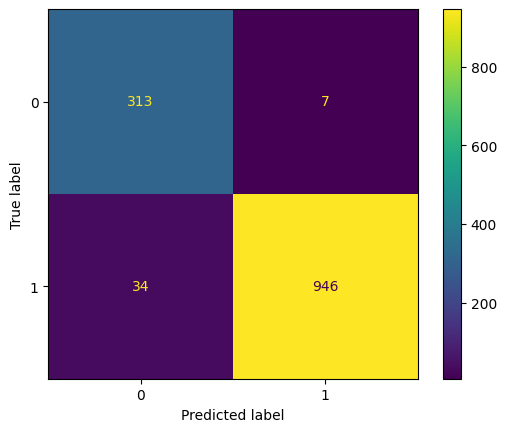

In [66]:
Hyper_Res = {'Estimator': [key for key in HyperTunPar], 'CVM': [], 'CVS': [], 'P_R': [], 'P_W': []}
for estimator in HyperTunPar.keys():
    print(estimator)
    name = HyperTunPar[estimator]
    print("Name", name, "\n")
    CreateModel(name,Hyper_Res)

In [67]:
Hyper_Res

{'Estimator': ['KNeighborsClassifier_Grid',
  'KNeighborsClassifier_RS',
  'DecisionTreeClassifier_Grid',
  'DecisionTreeClassifier_RS',
  'RandomForestClassifier_Grid',
  'RandomForestClassifier_RS',
  'SVC_Grid',
  'SVC_RS',
  'GaussianNB_Grid',
  'GaussianNB_RS'],
 'CVM': [0.9507751937984494,
  0.9507751937984494,
  0.9754228329809727,
  0.9707716701902748,
  0.9861874559548975,
  0.9869626497533474,
  0.9915433403805498,
  0.9915433403805498,
  0.9731324876673713,
  0.9731324876673713],
 'CVS': [0.0318997679580126,
  0.0318997679580126,
  0.020526076185473946,
  0.02450484558808331,
  0.020108074468871875,
  0.018391580797176534,
  0.015168918336710392,
  0.015168918336710392,
  0.02509618651577068,
  0.02509618651577068],
 'P_R': [0.9258064516129032,
  0.9258064516129032,
  0.9808917197452229,
  0.96875,
  0.9935691318327974,
  0.9903536977491961,
  0.9936908517350158,
  0.9936908517350158,
  0.9020172910662824,
  0.9020172910662824],
 'P_W': [0.9666666666666667,
  0.9666666666666

In [68]:
HyperRes_df = pd.DataFrame(Hyper_Res)
HyperRes_df = HyperRes_df.set_index('Estimator')
HyperRes_df

CVM       CVS       P_R       P_W
Estimator                                                          
KNeighborsClassifier_Grid    0.950775  0.031900  0.925806  0.966667
KNeighborsClassifier_RS      0.950775  0.031900  0.925806  0.966667
DecisionTreeClassifier_Grid  0.975423  0.020526  0.980892  0.987830
DecisionTreeClassifier_RS    0.970772  0.024505  0.968750  0.989796
RandomForestClassifier_Grid  0.986187  0.020108  0.993569  0.988878
RandomForestClassifier_RS    0.986963  0.018392  0.990354  0.987867
SVC_Grid                     0.991543  0.015169  0.993691  0.994914
SVC_RS                       0.991543  0.015169  0.993691  0.994914
GaussianNB_Grid              0.973132  0.025096  0.902017  0.992655
GaussianNB_RS                0.973132  0.025096  0.902017  0.992655

Text(0, 0.5, 'Score')

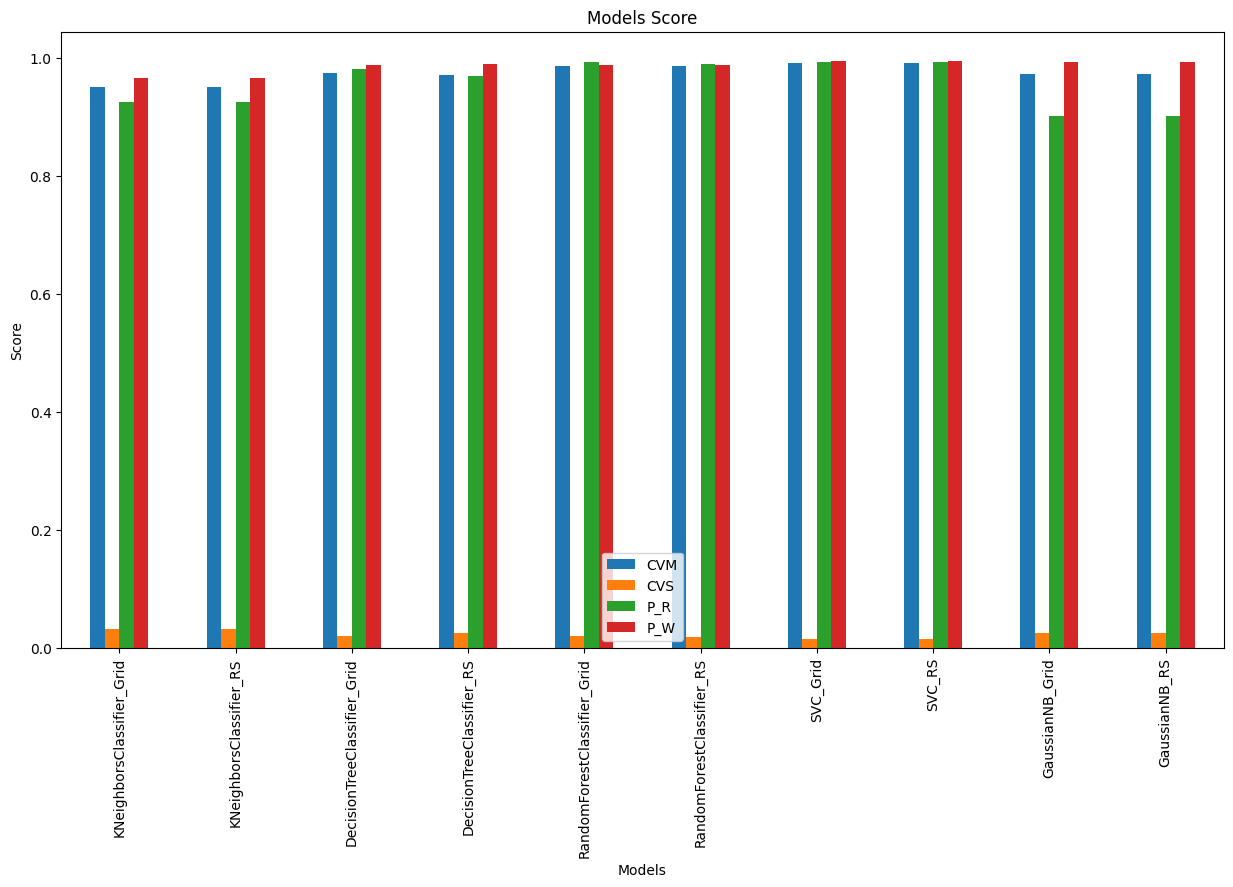

In [69]:
HyperRes_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

### Concatenate the two result dataframes

In [70]:
Results_df.head()

CVM       CVS       P_R       P_W
Estimator                                                     
KNeighborsClassifier    0.944644  0.032859  0.900958  0.961499
DecisionTreeClassifier  0.976163  0.021873  0.965839  0.990798
RandomForestClassifier  0.992336  0.012326  0.996845  0.995931
SVC                     0.942301  0.031374  0.931741  0.953327
GaussianNB              0.968499  0.026786  0.897143  0.993684

In [71]:
HyperRes_df.head()

CVM       CVS       P_R       P_W
Estimator                                                          
KNeighborsClassifier_Grid    0.950775  0.031900  0.925806  0.966667
KNeighborsClassifier_RS      0.950775  0.031900  0.925806  0.966667
DecisionTreeClassifier_Grid  0.975423  0.020526  0.980892  0.987830
DecisionTreeClassifier_RS    0.970772  0.024505  0.968750  0.989796
RandomForestClassifier_Grid  0.986187  0.020108  0.993569  0.988878

In [72]:
frames = [Results_df, HyperRes_df]
#df = pd.concat(frames, ignore_index=True)
TotalRes_df = pd.concat(frames)
TotalRes_df

CVM       CVS       P_R       P_W
Estimator                                                          
KNeighborsClassifier         0.944644  0.032859  0.900958  0.961499
DecisionTreeClassifier       0.976163  0.021873  0.965839  0.990798
RandomForestClassifier       0.992336  0.012326  0.996845  0.995931
SVC                          0.942301  0.031374  0.931741  0.953327
GaussianNB                   0.968499  0.026786  0.897143  0.993684
KNeighborsClassifier_Grid    0.950775  0.031900  0.925806  0.966667
KNeighborsClassifier_RS      0.950775  0.031900  0.925806  0.966667
DecisionTreeClassifier_Grid  0.975423  0.020526  0.980892  0.987830
DecisionTreeClassifier_RS    0.970772  0.024505  0.968750  0.989796
RandomForestClassifier_Grid  0.986187  0.020108  0.993569  0.988878
RandomForestClassifier_RS    0.986963  0.018392  0.990354  0.987867
SVC_Grid                     0.991543  0.015169  0.993691  0.994914
SVC_RS                       0.991543  0.015169  0.993691  0.994914
GaussianNB_Grid              0.973132  0.025096  0.902017  0.992655
GaussianNB_RS                0.973132  0.025096  0.902017  0.992655

Text(0, 0.5, 'Score')

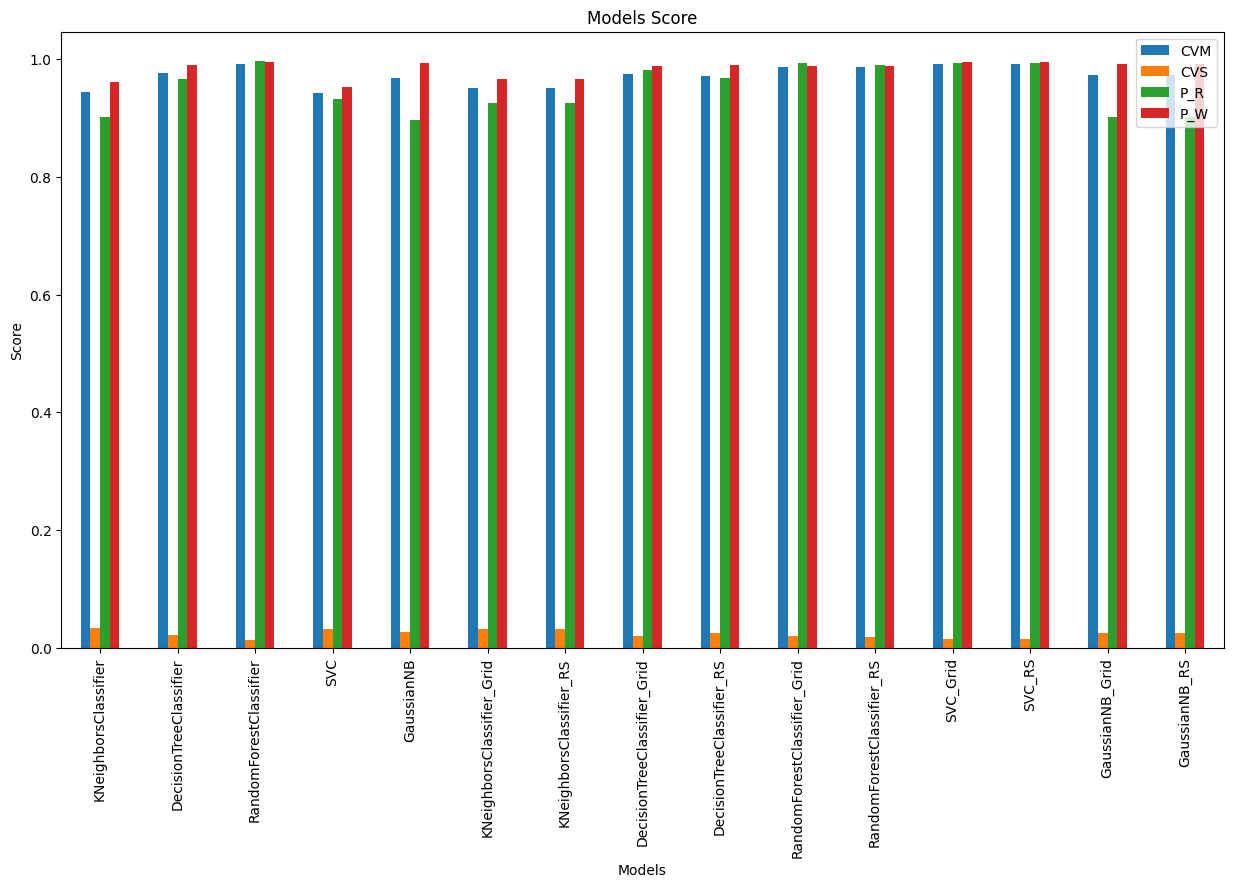

In [73]:
TotalRes_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

In [74]:
#print(Results_df['CVS'])
TotalRes_CVS = TotalRes_df['CVS']
print(TotalRes_CVS)

Estimator
KNeighborsClassifier           0.032859
DecisionTreeClassifier         0.021873
RandomForestClassifier         0.012326
SVC                            0.031374
GaussianNB                     0.026786
KNeighborsClassifier_Grid      0.031900
KNeighborsClassifier_RS        0.031900
DecisionTreeClassifier_Grid    0.020526
DecisionTreeClassifier_RS      0.024505
RandomForestClassifier_Grid    0.020108
RandomForestClassifier_RS      0.018392
SVC_Grid                       0.015169
SVC_RS                         0.015169
GaussianNB_Grid                0.025096
GaussianNB_RS                  0.025096
Name: CVS, dtype: float64


Text(0, 0.5, 'Score')

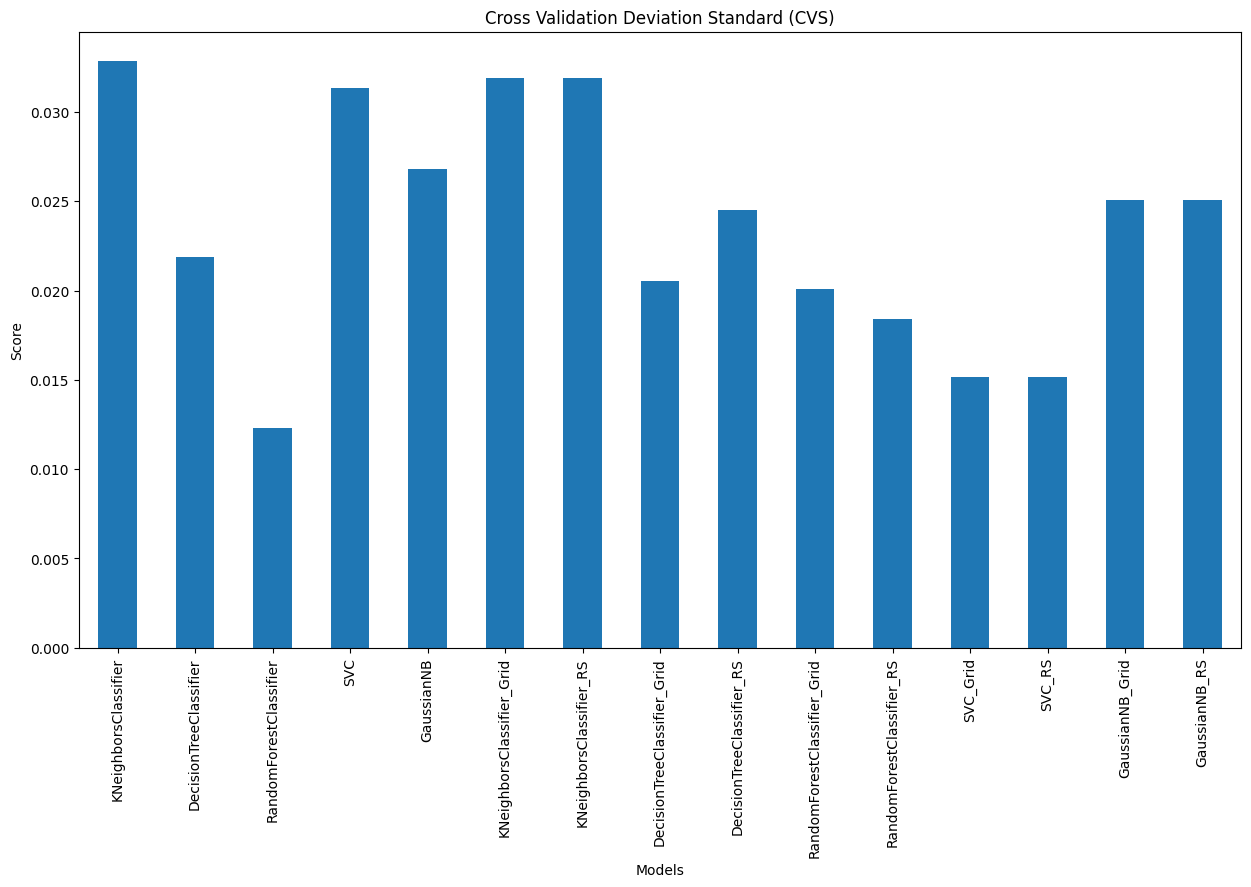

In [75]:
TotalRes_CVS.plot(kind="bar",figsize=(15, 8))
plt.title("Cross Validation Deviation Standard (CVS)")
plt.xlabel("Models")
plt.ylabel("Score")